# 311 Cases

### References:
https://data.sfgov.org/City-Infrastructure/311-Cases/vw6y-z8j6


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image

% matplotlib inline

In [7]:
df = pd.read_csv('311_Cases.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.tail()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Street,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL
3441536,8815619,04/01/2018 08:17:00 PM,04/01/2018 09:23:16 PM,04/01/2018 09:23:16 PM,Closed,Police Officer responded to request under CAD ...,Police - Homeless Concerns Queue,Homeless Concerns,Individual Concerns,aggressive_behavior,"537 STEVENSON ST, SAN FRANCISCO, CA, 94103",STEVENSON ST,6.0,South of Market,TENDERLOIN,37.780979,-122.410740,"(37.780979, -122.41074)",Mobile/Open311,NaN
3441537,8815674,04/01/2018 09:08:49 PM,04/01/2018 09:13:00 PM,04/01/2018 09:13:00 PM,Closed,Part of scheduled route that just went out.,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"903 STOCKTON ST, SAN FRANCISCO, CA, 94108",STOCKTON ST,3.0,Chinatown,CENTRAL,37.794123,-122.408007,"(37.79412323, -122.4080068)",Mobile/Open311,NaN
3441538,8815707,04/01/2018 09:33:45 PM,04/01/2018 09:50:00 PM,04/01/2018 09:50:00 PM,Closed,NaN,311 Supervisor Queue,Graffiti,Graffiti on Other_enter_additional_details_below,Other_enter_additional_details_below - Offensive,Intersection of BUSH ST and JONES ST,BUSH ST,3.0,Lower Nob Hill,CENTRAL,37.789485,-122.413681,"(37.78948482, -122.41368093)",Mobile/Open311,NaN
3441539,8815765,04/01/2018 10:05:17 PM,04/01/2018 10:05:21 PM,04/01/2018 10:05:21 PM,Closed,Request is a duplicate of 8801013. Your notes ...,DPW Ops Queue,Encampments,Encampment Reports,Encampment Cleanup,"444 SPEAR ST, SAN FRANCISCO, CA, 94105",SPEAR ST,6.0,Rincon Hill,SOUTHERN,37.788286,-122.388676,"(37.78828557, -122.38867556)",Mobile/Open311,NaN
3441540,8815805,04/01/2018 10:27:36 PM,04/01/2018 10:27:39 PM,04/01/2018 10:27:39 PM,Closed,Request is a duplicate of 8809810. Your notes ...,DPW Ops Queue,Encampments,Encampment Reports,Encampment Cleanup,"84 WOODWARD ST, SAN FRANCISCO, CA, 94103",WOODWARD ST,9.0,Mission,MISSION,37.768470,-122.420770,"(37.76847, -122.42077)",Mobile/Open311,http://mobile311.sfgov.org/reports/8815805/photos


In [3]:
df.head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Street,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL
0,10667600,03/31/2019 12:12:13 PM,03/31/2019 01:34:27 PM,03/31/2019 01:34:27 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Furniture,"333 RANDOLPH ST, SAN FRANCISCO, CA, 94132",RANDOLPH ST,11.0,Merced Heights,TARAVAL,37.714110,-122.465725,"(37.71411, -122.465725)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667600/ph...
1,10667603,03/31/2019 12:13:58 PM,03/31/2019 12:38:53 PM,03/31/2019 12:38:53 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Mattress,"1509 GOLDEN GATE AVE, SAN FRANCISCO, CA, 94115",GOLDEN GATE AVE,5.0,Western Addition,NORTHERN,37.779110,-122.435754,"(37.77911015, -122.43575424)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667603/ph...
2,10667604,03/31/2019 12:14:11 PM,03/31/2019 01:50:01 PM,03/31/2019 01:50:01 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Refrigerator,"15 STILLMAN ST, SAN FRANCISCO, CA, 94107",STILLMAN ST,6.0,South of Market,SOUTHERN,37.783115,-122.394470,"(37.78311539, -122.39447021)",Integrated Agency,NaN
3,10667606,03/31/2019 12:14:13 PM,NaN,03/31/2019 12:15:34 PM,Open,accepted,DPW Ops Queue,Graffiti,Graffiti on Building_other,Building_other - Not_Offensive,"413 10TH ST, SAN FRANCISCO, CA, 94103",10TH ST,6.0,South of Market,SOUTHERN,37.771385,-122.410767,"(37.77138519, -122.4107666)",Integrated Agency,NaN
4,10667609,03/31/2019 12:15:00 PM,03/31/2019 01:38:00 PM,03/31/2019 01:38:00 PM,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Liquids - Oil/Paint/Other,"1382 ALABAMA ST, SAN FRANCISCO, CA, 94110",ALABAMA ST,9.0,Mission,MISSION,37.749758,-122.410936,"(37.749758, -122.410936)",Mobile/Open311,NaN


In [23]:
df = df.loc[df['Media URL'].isna() != True]

In [5]:
df.shape

(872754, 20)

In [61]:
# Size of thumbnail image
size = (128, 128)

def get_image(df):
    try: 
        response = requests.get(df['Media URL'], stream=True)
        response.raw.decode_content = True
        with Image.open(response.raw) as image:
            image = image.resize(size)
            image = image.convert('RGB')
            np_im = np.array(image)
            #print(np_im)
            return np_im
    except:
        return np.nan

In [63]:
chunksize = 200

df['image'] = np.nan

for i in range(0, 401, chunksize):
    df.iloc[i:chunksize]['image'] = df.iloc[i:chunksize].apply(get_image, axis=1)
    print(i)
    
df.to_csv('images'+ '.csv')

df.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0
200
400


,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,...,Street,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL,image
0,10667600,03/31/2019 12:12:13 PM,03/31/2019 01:34:27 PM,03/31/2019 01:34:27 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Furniture,...,RANDOLPH ST,11.0,Merced Heights,TARAVAL,37.714110,-122.465725,"(37.71411, -122.465725)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667600/ph...,NaN
1,10667603,03/31/2019 12:13:58 PM,03/31/2019 12:38:53 PM,03/31/2019 12:38:53 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Mattress,...,GOLDEN GATE AVE,5.0,Western Addition,NORTHERN,37.779110,-122.435754,"(37.77911015, -122.43575424)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667603/ph...,NaN
5,10667610,03/31/2019 12:15:00 PM,03/31/2019 01:18:00 PM,03/31/2019 01:18:00 PM,Closed,NaN,DPW Ops Queue,Graffiti,Graffiti on City_receptacle,City_receptacle - Offensive,...,GOLDEN GATE AVE,5.0,Western Addition,NORTHERN,37.779213,-122.435574,"(37.77921321, -122.43557434)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667610/ph...,NaN
7,10667612,03/31/2019 12:16:00 PM,03/31/2019 01:14:00 PM,03/31/2019 01:14:00 PM,Closed,NaN,DPW - Bureau of Street Environmental Services - G,Graffiti,Graffiti on Other_enter_additional_details_below,Other_enter_additional_details_below - Offensive,...,GOLDEN GATE AVE,5.0,Western Addition,NORTHERN,37.779227,-122.435345,"(37.77922675, -122.43534543)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667612/ph...,NaN
8,10667620,03/31/2019 12:19:56 PM,03/31/2019 01:26:09 PM,03/31/2019 01:26:09 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Furniture,...,GUERRERO ST,8.0,Mission Dolores,MISSION,37.764888,-122.424161,"(37.76488767, -122.42416108)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667620/ph...,NaN


In [64]:
df.shape

(872754, 21)

In [65]:
df_mini = df.iloc[0:60000]

df_mini.image = df_mini.apply(get_image, axis=1)

df_mini.head()

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,...,Street,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL,image
0,10667600,03/31/2019 12:12:13 PM,03/31/2019 01:34:27 PM,03/31/2019 01:34:27 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Furniture,...,RANDOLPH ST,11.0,Merced Heights,TARAVAL,37.714110,-122.465725,"(37.71411, -122.465725)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667600/ph...,"[[[176, 209, 240], [103, 124, 151], [101, 123,..."
1,10667603,03/31/2019 12:13:58 PM,03/31/2019 12:38:53 PM,03/31/2019 12:38:53 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Mattress,...,GOLDEN GATE AVE,5.0,Western Addition,NORTHERN,37.779110,-122.435754,"(37.77911015, -122.43575424)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667603/ph...,"[[[36, 37, 31], [118, 119, 113], [49, 54, 50],..."
5,10667610,03/31/2019 12:15:00 PM,03/31/2019 01:18:00 PM,03/31/2019 01:18:00 PM,Closed,NaN,DPW Ops Queue,Graffiti,Graffiti on City_receptacle,City_receptacle - Offensive,...,GOLDEN GATE AVE,5.0,Western Addition,NORTHERN,37.779213,-122.435574,"(37.77921321, -122.43557434)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667610/ph...,"[[[155, 143, 129], [180, 171, 156], [171, 162,..."
7,10667612,03/31/2019 12:16:00 PM,03/31/2019 01:14:00 PM,03/31/2019 01:14:00 PM,Closed,NaN,DPW - Bureau of Street Environmental Services - G,Graffiti,Graffiti on Other_enter_additional_details_below,Other_enter_additional_details_below - Offensive,...,GOLDEN GATE AVE,5.0,Western Addition,NORTHERN,37.779227,-122.435345,"(37.77922675, -122.43534543)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667612/ph...,"[[[118, 125, 133], [121, 125, 134], [126, 130,..."
8,10667620,03/31/2019 12:19:56 PM,03/31/2019 01:26:09 PM,03/31/2019 01:26:09 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Furniture,...,GUERRERO ST,8.0,Mission Dolores,MISSION,37.764888,-122.424161,"(37.76488767, -122.42416108)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667620/ph...,"[[[132, 156, 192], [81, 110, 144], [175, 203, ..."


In [66]:
df_mini.to_csv('df_mini_60000.csv')

In [67]:
df_mini.shape

(60000, 21)

In [53]:
im = get_image(file)

In [56]:
df.head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,...,Street,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL,image
0,10667600,03/31/2019 12:12:13 PM,03/31/2019 01:34:27 PM,03/31/2019 01:34:27 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Furniture,...,RANDOLPH ST,11.0,Merced Heights,TARAVAL,37.714110,-122.465725,"(37.71411, -122.465725)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667600/ph...,NaN
1,10667603,03/31/2019 12:13:58 PM,03/31/2019 12:38:53 PM,03/31/2019 12:38:53 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Mattress,...,GOLDEN GATE AVE,5.0,Western Addition,NORTHERN,37.779110,-122.435754,"(37.77911015, -122.43575424)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667603/ph...,NaN
5,10667610,03/31/2019 12:15:00 PM,03/31/2019 01:18:00 PM,03/31/2019 01:18:00 PM,Closed,NaN,DPW Ops Queue,Graffiti,Graffiti on City_receptacle,City_receptacle - Offensive,...,GOLDEN GATE AVE,5.0,Western Addition,NORTHERN,37.779213,-122.435574,"(37.77921321, -122.43557434)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667610/ph...,NaN
7,10667612,03/31/2019 12:16:00 PM,03/31/2019 01:14:00 PM,03/31/2019 01:14:00 PM,Closed,NaN,DPW - Bureau of Street Environmental Services - G,Graffiti,Graffiti on Other_enter_additional_details_below,Other_enter_additional_details_below - Offensive,...,GOLDEN GATE AVE,5.0,Western Addition,NORTHERN,37.779227,-122.435345,"(37.77922675, -122.43534543)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667612/ph...,NaN
8,10667620,03/31/2019 12:19:56 PM,03/31/2019 01:26:09 PM,03/31/2019 01:26:09 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Furniture,...,GUERRERO ST,8.0,Mission Dolores,MISSION,37.764888,-122.424161,"(37.76488767, -122.42416108)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667620/ph...,NaN


In [69]:
df_mini.image[0].shape

(128, 128, 3)

In [137]:
chunksize = 1000
for i in range(0, df_mini.shape[0], chunksize):
    chunk = df_mini.iloc[i:min((i+chunksize), df_mini.shape[0])]
    try:
        chunk.to_pickle('mini_' + str(i) + '.pickle.gzde', compression='gzip')
    except:
        print(str(i) + 'failed')

In [84]:
df_mini.shape[0]

60000

In [99]:
df_mini_images = df_mini.image

In [108]:
df_mini_images[0].flatten()

array([176, 209, 240, ...,  82,  89,  95], dtype=uint8)

In [118]:
df_mini2 = df_mini[['image', 'CaseID']]

In [127]:
df_mini2.image[0].flatten().shape

(49152,)

In [135]:
df_mini2 = df_mini2.dropna()
for idx, image in df_mini2['image'].iteritems():
    df_mini2['image'][idx] = np.reshape(image, 49152)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [136]:
df_mini2.to_csv('images_only.csv')

In [138]:
df_mini2.head()

,image,CaseID
0,"[176, 209, 240, 103, 124, 151, 101, 123, 146, ...",10667600
1,"[36, 37, 31, 118, 119, 113, 49, 54, 50, 35, 7,...",10667603
5,"[155, 143, 129, 180, 171, 156, 171, 162, 147, ...",10667610
7,"[118, 125, 133, 121, 125, 134, 126, 130, 139, ...",10667612
8,"[132, 156, 192, 81, 110, 144, 175, 203, 240, 1...",10667620


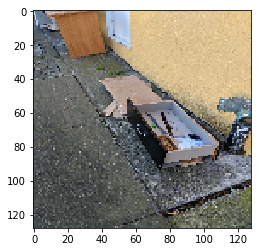

In [141]:
plt.imshow(df_mini2.image[0].reshape(128,128, 3))

In [11]:

df['Opened'] = pd.to_datetime(df['Opened'])
df['year'] = df['Opened'].dt.year
df['month'] = df['Opened'].dt.month

In [24]:
groups = df.groupby('year').count()
groups

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,...,Street,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL,month
year,,,,,,,,,,,,,,,,,,,,,
2013,9366,9366,9265,9366,9366,8760,9366,9366,9366,9051,...,9077,9359,9339,9334,9366,9366,9366,9366,9366,9366
2014,54009,54009,53478,54009,54009,49839,54009,54009,54009,52968,...,52866,53953,53833,53813,54009,54009,54009,54009,54009,54009
2015,106227,106227,105544,106227,106227,95744,106227,106227,106227,104681,...,104168,106182,105923,105878,106227,106227,106227,106227,106227,106227
2016,175203,175203,173082,175203,175203,141794,175203,175203,175203,172278,...,172109,175175,174582,174508,175203,175203,175203,175203,175203,175203
2017,192679,192679,189131,192679,192679,120673,192679,192679,192679,189491,...,189295,192646,191959,191856,192679,192679,192679,192679,192679,192679
2018,262475,262475,257146,262475,262475,174745,262475,262475,262475,257398,...,262443,262443,262360,262281,262475,262475,262475,262475,262475,262475
2019,72795,72795,66727,72795,72795,52220,72795,72795,72795,71427,...,72786,72786,72780,72756,72795,72795,72795,72795,72795,72795


In [25]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Street', 'Supervisor District', 'Neighborhood',
       'Police District', 'Latitude', 'Longitude', 'Point', 'Source',
       'Media URL', 'year', 'month'],
      dtype='object')

In [26]:
df.Street.nunique()

2462

In [27]:
df.Neighborhood.nunique()

117

In [29]:
groups_m = df.groupby(['year', 'month']).count()
groups_m

CaseID  Opened  Closed  Updated  Status  Status Notes  \
year month                                                          
2013 5          34      34      34       34      34            34   
     6          31      31      30       31      31            30   
     7         112     112     109      112     112            94   
     8         794     794     781      794     794           705   
     9        1402    1402    1378     1402    1402          1274   
     10       1674    1674    1660     1674    1674          1583   
     11       2343    2343    2322     2343    2343          2236   
     12       2976    2976    2951     2976    2976          2804   
2014 1        3818    3818    3790     3818    3818          3549   
     2        2533    2533    2512     2533    2533          2340   
     3        3546    3546    3509     3546    3546          3277   
     4        4046    4046    3990     4046    4046          3801   
     5        4685    4685    4631     4685    4685          4343   
     6        4892    4892    4830     4892    4892          4490   
     7        4541    4541    4494     4541    4541          4198   
     8        5735    5735    5710     5735    5735          5384   
     9        5179    5179    5145     5179    5179          4809   
     10       4607    4607    4565     4607    4607          4243   
     11       5756    5756    5703     5756    5756          5170   
     12       4671    4671    4599     4671    4671          4235   
2015 1        7548    7548    7467     7548    7548          6674   
     2        8461    8461    8429     8461    8461          7479   
     3        8810    8810    8760     8810    8810          7842   
     4        7675    7675    7629     7675    7675          6485   
     5        6952    6952    6914     6952    6952          6283   
     6        9449    9449    9386     9449    9449          8665   
     7        9355    9355    9285     9355    9355          8564   
     8        8147    8147    8108     8147    8147          7589   
     9        9816    9816    9754     9816    9816          8883   
     10      10894   10894   10837    10894   10894          9850   
...            ...     ...     ...      ...     ...           ...   
2016 11      15391   15391   15174    15391   15391         10973   
     12      13049   13049   12924    13049   13049          8722   
2017 1       16078   16078   15947    16078   16078         10323   
     2       13642   13642   13507    13642   13642          8559   
     3       15272   15272   14987    15272   15272          9928   
     4       14505   14505   14299    14505   14505          9459   
     5       15040   15040   14725    15040   15040          9863   
     6       16700   16700   16364    16700   16700         10568   
     7       16652   16652   16270    16652   16652          9940   
     8       18887   18887   18378    18887   18887         10882   
     9       17994   17994   17468    17994   17994         11111   
     10      17450   17450   17165    17450   17450         10614   
     11      16312   16312   16079    16312   16312         10423   
     12      14147   14147   13942    14147   14147          9003   
2018 1       19677   19677   19340    19677   19677         12882   
     2       17395   17395   17086    17395   17395         11250   
     3       17318   17318   16903    17318   17318         11325   
     4       21892   21892   21295    21892   21892         15033   
     5       24731   24731   24260    24731   24731         16745   
     6       22611   22611   22162    22611   22611         15460   
     7       23317   23317   22880    23317   23317         15470   
     8       24284   24284   23887    24284   24284         15676   
     9       22770   22770   22416    22770   22770         15147   
     10      25410   25410   24962    25410   25410         16868   
     11      22143   22143   21579    22143   22143         14944   
     12   